In [1]:
import pandas as pd
pd.set_option("display.max_columns",500)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy import stats
from statsmodels.stats import weightstats as stests
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,KFold,cross_val_score
import warnings
warnings.filterwarnings("ignore")
sns.set_style('whitegrid')

In [2]:
train_data=pd.read_csv("train.csv")
train_raw=train_data
test_data=pd.read_csv("test.csv")
test_raw=test_data
#Note: First_payment_date format was changed similat to Origination_Date, in Excel sheet 

###### Target variable: m13

###### Independent Variables

In [14]:
Ind_var=list(train_data.drop(["m13"],axis=1).columns)
print("Number of Independent Variables as per Dataset provided: {} \n \n{}  ".format(len(Ind_var),Ind_var))

Number of Independent Variables as per Dataset provided: 28 
 
['loan_id', 'source', 'financial_institution', 'interest_rate', 'unpaid_principal_bal', 'loan_term', 'origination_date', 'first_payment_date', 'loan_to_value', 'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose', 'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']  


### Check for Variable Data Type

In [85]:
Numerical_var=list(train_data.select_dtypes(include=np.number).columns)
Categorical_var=list(train_data.select_dtypes(include="O").columns)
print("{} Numerical Variables: \n \n {} \n\n {} Categorical Variables: \n\n {}".format(len(Numerical_var),Numerical_var,len(Categorical_var),Categorical_var))

26 Numerical Variables: 
 
 ['loan_id', 'interest_rate', 'unpaid_principal_bal', 'loan_term', 'loan_to_value', 'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score', 'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13', 'days_payment_from_origin', 'Total_Delinquency_Count'] 

 3 Categorical Variables: 

 ['source', 'financial_institution', 'loan_purpose']


###### 'origination_date' and 'first_payment_date' should be converted to Date type instead of Categorical

### Descriptive Statistics for Numerical Variables

In [4]:
train_data.describe()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,1.160580e+05,116058.000000,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,5.494154e+11,3.868961,2.082262e+05,292.280997,67.431939,1.593186,30.742293,769.926778,2.786288,459.611565,0.003257,0.003197,0.002059,0.001973,0.002180,0.003533,0.003421,0.004162,0.004825,0.005359,0.006617,0.007109,0.008065,0.005480
std,2.597569e+11,0.461020,1.146851e+05,89.762415,17.291719,0.491242,9.730798,42.210706,8.096464,381.946926,0.056977,0.063354,0.051391,0.055427,0.062161,0.082638,0.087553,0.100961,0.113128,0.128242,0.148430,0.162884,0.178128,0.073824
min,1.000000e+11,2.250000,1.100000e+04,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.240000e+11,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.490000e+11,3.875000,1.830000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.740000e+11,4.125000,2.780000e+05,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000e+12,6.750000,1.200000e+06,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,1.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,1.000000


### Descriptive Statistics for Categorical Variables

In [5]:
train_data.describe(include="O")

,source,financial_institution,origination_date,first_payment_date,loan_purpose
count,116058,116058,116058,116058,116058
unique,3,19,3,4,3
top,X,OTHER,01 February 2012,01 April 2012,A23
freq,63858,49699,52334,52840,58462


In [6]:
pd.DataFrame({"Skewness":train_data.skew(),"Kurtosis":train_data.kurtosis()})

,Skewness,Kurtosis
loan_id,0.004119,-1.197547
interest_rate,0.051326,0.169871
unpaid_principal_bal,0.897524,0.556988
loan_term,-0.692948,-1.293404
loan_to_value,-0.765251,0.078106
number_of_borrowers,-0.379397,-1.856090
debt_to_income_ratio,-0.194303,-0.825119
borrower_credit_score,-3.570945,48.502768
insurance_percent,2.743691,5.871008
co-borrower_credit_score,-0.362473,-1.849904


##### Skewness
         -0.5 to -0.5    = Data are fairly Symmetrical
         -1 to -0.5      = Negatively Skewed
          0.5 to 1       = Positively Skewed
          less than -1   = Higly Negatively Skewed
          greater than 1 = Higly Positively Skewed

### Missing Value Check

In [8]:
def missing_values_table(df):
    total=df.isnull().sum().sort_values(ascending=False)
    percent=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data=pd.concat([total,percent],axis=1,keys=["Total","Percentage"])
    return missing_data

In [9]:
missing_values_table(train_data)

,Total,Percentage
m13,0,0.0
insurance_percent,0,0.0
source,0,0.0
financial_institution,0,0.0
interest_rate,0,0.0
unpaid_principal_bal,0,0.0
loan_term,0,0.0
origination_date,0,0.0
first_payment_date,0,0.0
loan_to_value,0,0.0


###### there are no missing values in dataset provided

### Target Variable : m13

In [29]:
pd.DataFrame({"Count":train_data.m13.value_counts(),"Percentage":train_data.m13.value_counts(normalize=True)})

,Count,Percentage
0,115422,0.99452
1,636,0.00548


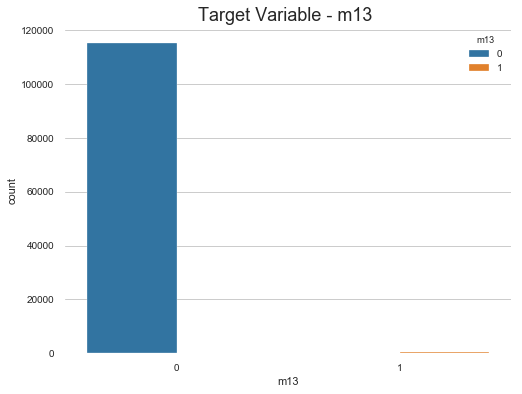

In [36]:
plt.figure(figsize=(8,6))
plt.title("Target Variable - m13 ",fontsize=18)
sns.countplot(x="m13",data=train_data,hue="m13");

###### Target Variable is highly class imbalanced with 99.45% of 0 and  0.548% of 1. We can use Ensemble techniques like Bagging and Boosting  

### Independent Variable: Source

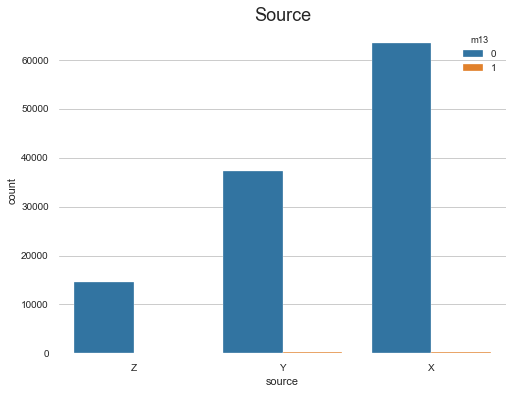

In [39]:
plt.figure(figsize=(8,6))
plt.title("Source",fontsize=18)
sns.countplot(x="source",data=train_data,hue="m13");

In [67]:
source_contigency=train_data[["source","m13"]].pivot_table(index="source",columns='m13',aggfunc=len,fill_value=0)
source_contigency

m13,0,1
source,,
X,63553,305
Y,37307,247
Z,14562,84


##### Pearson’s chi-squared test for independence

Null hypothesis: Assumes that there is no association between Source and m13.

Alternative hypothesis: Assumes that there is an association between Source and m13.

In [64]:
stat, p, dof, expected = chi2_contingency(source_contigency)
prob=0.95
alpha=1-prob
if p <= alpha:
    print("Calucalted Statistic: {}  \n".format(stat))
    print("P-Value: {}  \n".format(p))
    print("Significant Value: {}  \n".format(alpha))
    print("Rejected Null Hypothesis and Source is a Significant variable to Predict Target Class with a probability of {}%".format((1-p)*100))
else:
    print("Failed to Reject Null Hypothesis and Source is not a Significant Variable to Predict Target Classwith a probability of {}%".format((1-p)*100))


Calucalted Statistic: 14.273977017701323  

P-Value: 0.0007951430607655225  

Significant Value: 0.050000000000000044  

Rejected Null Hypothesis and Source is a Significant variable to Predict Target Class with a probability of 99.92048569392344%


### Independent Variable: Financial Institution

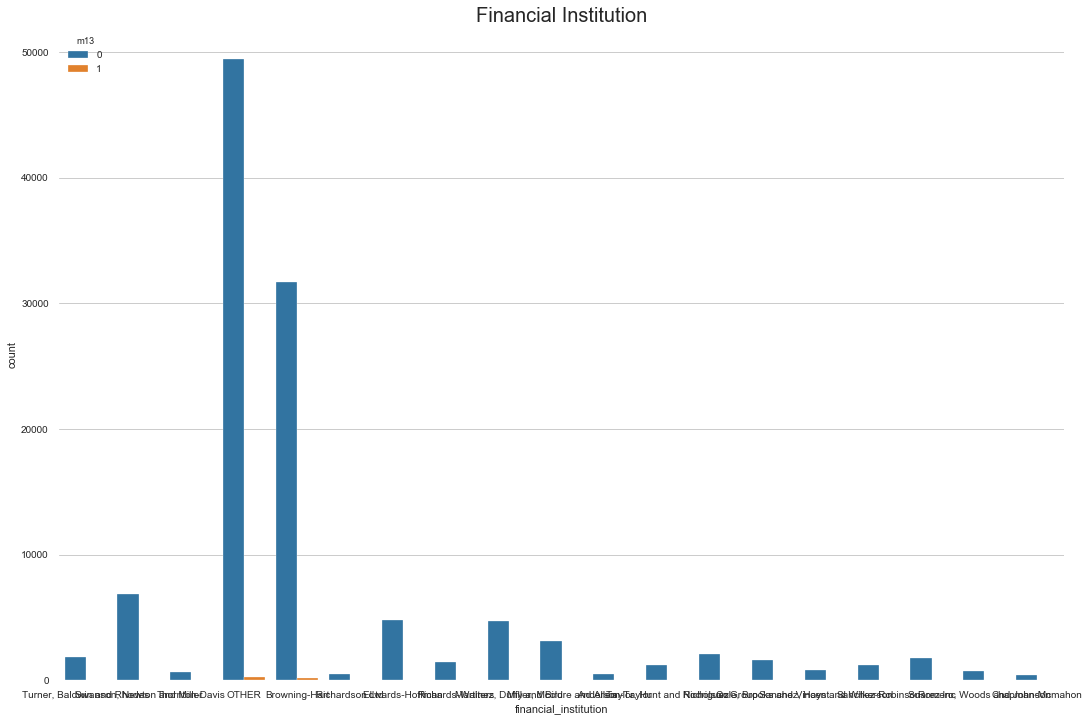

In [77]:
plt.figure(figsize=(18,12))
plt.title("Financial Institution",fontsize=20)
sns.countplot(x="financial_institution",hue="m13",data=train_data);

In [92]:
finan_contigency=train_data[["financial_institution","m13"]].pivot_table(index="financial_institution",columns='m13',aggfunc=len,fill_value=0)
finan_contigency

m13,0,1
financial_institution,,
Anderson-Taylor,480,3
Browning-Hart,31677,175
Chapman-Mcmahon,388,0
"Cole, Brooks and Vincent",1630,12
Edwards-Hoffman,4816,41
"Martinez, Duffy and Bird",4692,23
"Miller, Mcclure and Allen",3139,19
Nicholson Group,2105,11
OTHER,49430,269


##### Pearson’s chi-squared test for independence

Null hypothesis: Assumes that there is no association between financial_institution and m13.

Alternative hypothesis: Assumes that there is an association between financial_institution and m13.

In [74]:
stat, p, dof, expected = chi2_contingency(finan_contigency)
prob=0.90
alpha=1-prob
if p <= alpha:
    print("Calucalted Statistic: {}  \n".format(stat))
    print("P-Value: {}  \n".format(p))
    print("Significant Value: {}  \n".format(alpha))
    print("Rejected Null Hypothesis and financial_institution is a Significant variable to Predict Target Class with a probability of {}%".format((1-p)*100))
else:
    print("Failed to Reject Null Hypothesis and financial_institution is not a Significant Variable to Predict Target Classwith a probability of {}%".format((1-p)*100))


Calucalted Statistic: 28.05594342474573  

P-Value: 0.061208948723234166  

Significant Value: 0.09999999999999998  

Rejected Null Hypothesis and financial_institution is a Significant variable to Predict Target Class with a probability of 93.87910512767658%


### Independent Variable: Interest rate

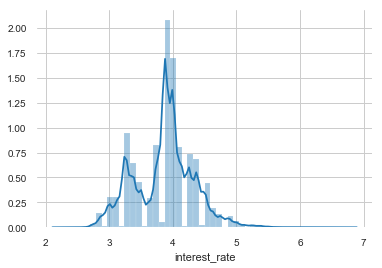

In [85]:
sns.distplot(train_data["interest_rate"]);

Observation: Intrest rate has Bimodal distribution with 2 peaks

Average Intrest rate for Delinquent: 4.206182389937107 
Average Intrest rate for Not-Delinquent: 3.867102554105803 
 



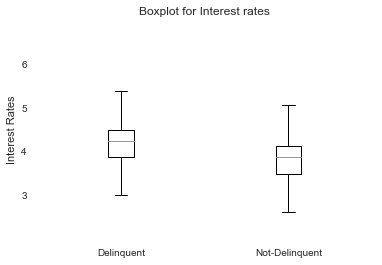

In [104]:
default_intrest=train_data[train_data["m13"]==1]["interest_rate"].values
success_intrest=train_data[train_data["m13"]==0]["interest_rate"].values
print("Average Intrest rate for Delinquent: {} \nAverage Intrest rate for Not-Delinquent: {} \n \n".format(default_intrest.mean(),success_intrest.mean()))
plt.title("Boxplot for Interest rates")
plt.boxplot([default_intrest,success_intrest])
plt.xticks([1,2],("Delinquent","Not-Delinquent"))
plt.ylabel('Interest Rates')
plt.grid()
plt.show()

###### From the Boxplot above, Average Interest rate for Delinquent is higher than Non-Delinquent

#### Z-Test: whether mean of two groups are statistically different

Null hypothesis: There is no Significant difference between Means of Intrest rate between Delinquent and Not Delinquent

Alternative hypothesis: There is Significant difference between Means of Intrest rate between Delinquent and Not Delinquent


In [112]:
ztest,pval=stests.ztest(x1=default_intrest,x2=success_intrest,value=0,alternative="two-sided")
prob=0.95
alpha=1-prob
if pval<alpha:
    print("Caluclated Statistic: {}  \n".format(ztest))
    print("P-Value: {}  \n".format(pval))
    print("Significant Value: {}  \n".format(alpha))
    print("Rejected Null Hypothesis and there is Significant difference between Means of Intrest rates between Delinquent and Not Delinquent  with a probability of {}%".format((1-pval)*100))
else:
    print("Caluclated Statistic: {}  \n".format(ztest))
    print("P-Value: {}  \n".format(pval))
    print("Significant Value: {}  \n".format(alpha))
    print("Failed to reject Null Hypothesis and there is no significant difference between Means of Intrest rates between Delinquent and Not Delinquent  with a probability of {}%".format((1-pval)*100))

Caluclated Statistic: 18.52493821916661  

P-Value: 1.2995224056056646e-76  

Significant Value: 0.050000000000000044  

Rejected Null Hypothesis and there is Significant difference between Means of Intrest rates between Delinquent and Not Delinquent  with a probability of 100.0%


### Independent Variable: Unpaid Principal Balance

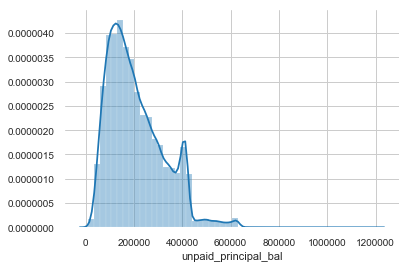

In [100]:
sns.distplot(train_data["unpaid_principal_bal"])

Observation: Variable is positively Skewed

Average Unpaid Principal Balance for Delinquent: 181776.72955974843 
Average Unpaid Principal Balance for Not-Delinquent: 208371.96548318345 
 



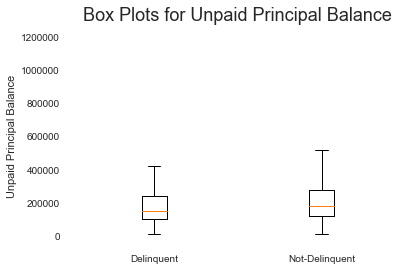

In [107]:
default_principal = train_data[train_data['m13']==1]['unpaid_principal_bal'].values

success_principal = train_data[train_data['m13']==0]['unpaid_principal_bal'].values
print("Average Unpaid Principal Balance for Delinquent: {} \nAverage Unpaid Principal Balance for Not-Delinquent: {} \n \n".format(default_principal.mean(),success_principal.mean()))
plt.boxplot([default_principal, success_principal])
plt.title('Box Plots for Unpaid Principal Balance',fontsize=18)
plt.xticks([1,2],("Delinquent","Not-Delinquent"))
plt.ylabel('Unpaid Principal Balance')
plt.grid()
plt.show()

#### Z-Test: whether mean of two groups are statistically different

Null hypothesis: There is no Significant difference between Means of Unpaid Principal Balance between Delinquent and Not Delinquent

Alternative hypothesis: There is Significant difference between Means of Unpaid Principal Balance between Delinquent and Not Delinquent


In [111]:
ztest,pval=stests.ztest(x1=default_principal,x2=success_principal,value=0,alternative="two-sided")
prob=0.95
alpha=1-prob
if pval<alpha:
    print("Caluclated Statistic: {}  \n".format(ztest))
    print("P-Value: {}  \n".format(pval))
    print("Significant Value: {}  \n".format(alpha))
    print("Rejected Null Hypothesis and there is Significant difference between Means of Unpaid Principal Balance between Delinquent and Not Delinquent  with a probability of {}%".format((1-pval)*100))
else:
    print("Caluclated Statistic: {}  \n".format(ztest))
    print("P-Value: {}  \n".format(pval))
    print("Significant Value: {}  \n".format(alpha))
    print("Failed to reject Null Hypothesis and there is no significant difference between Means of Unpaid Principal Balance between Delinquent and Not Delinquent  with a probability of {}%".format((1-pval)*100))

Caluclated Statistic: -5.833026482958231  

P-Value: 5.44309248115689e-09  

Significant Value: 0.050000000000000044  

Rejected Null Hypothesis and there is Significant difference between Means of Unpaid Principal Balance between Delinquent and Not Delinquent  with a probability of 99.99999945569074%


### Independent variable: Loan Term

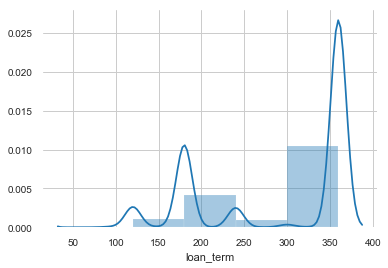

In [117]:
sns.distplot(train_data["loan_term"],bins=5);

###### Observation: variable shows multimodal distribution and Negatively Skewed

Average Loan term for Delinquent: 320.6996855345912 
Average Loan term for Not-Delinquent: 292.12440435965414 
 



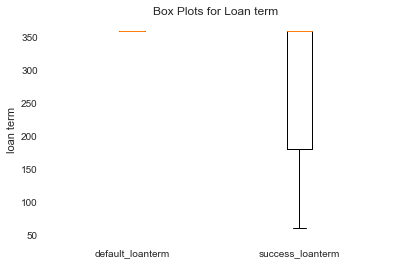

In [119]:
default_loanterm = train_data[train_data['m13']==1]['loan_term'].values
success_loanterm = train_data[train_data['m13']==0]['loan_term'].values
print("Average Loan term for Delinquent: {} \nAverage Loan term for Not-Delinquent: {} \n \n".format(default_loanterm.mean(),success_loanterm.mean()))
plt.boxplot([default_loanterm,success_loanterm])
plt.title('Box Plots for Loan term')
plt.xticks([1,2],('default_loanterm','success_loanterm'))
plt.ylabel('loan term')
plt.grid()
plt.show()

Average Loan term is more for Delinquent than Non-Delinquent

#### Z-Test: whether mean of two groups are statistically different

Null hypothesis: There is no Significant difference between Means of Loan term between Delinquent and Not Delinquent

Alternative hypothesis: There is Significant difference between Means of Loan term between Delinquent and Not Delinquent


In [125]:
ztest,pval=stests.ztest(x1=default_loanterm,x2=success_loanterm,value=0,alternative="two-sided")
prob=0.95
alpha=1-prob
if pval<alpha:
    print("Caluclated Statistic: {}  \n".format(ztest))
    print("P-Value: {}  \n".format(pval))
    print("Significant Value: {}  \n".format(alpha))
    print("Rejected Null Hypothesis and there is Significant difference between Means of Loan terms between Delinquent and Not Delinquent  with a probability of {}%".format((1-pval)*100))
else:
    print("Caluclated Statistic: {}  \n".format(ztest))
    print("P-Value: {}  \n".format(pval))
    print("Significant Value: {}  \n".format(alpha))
    print("Failed to reject Null Hypothesis and there is no significant difference between Means of Loan term between Delinquent and Not Delinquent  with a probability of {}%".format((1-pval)*100))

Caluclated Statistic: 8.00846712900314  

P-Value: 1.1614699615146843e-15  

Significant Value: 0.050000000000000044  

Rejected Null Hypothesis and there is Significant difference between Means of Loan terms between Delinquent and Not Delinquent  with a probability of 99.99999999999989%


### Independent Variable: Loan to value

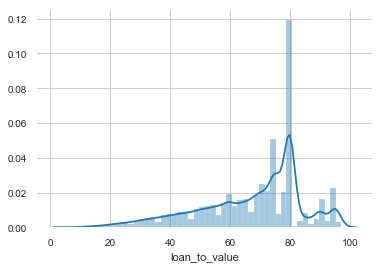

In [127]:
sns.distplot(train_data["loan_to_value"]);

Observation: Variable is Negatively Skewed

Average Loan to value for Delinquent: 71.24213836477988 
Average Loan to value for Not-Delinquent: 67.4109441874166 
 



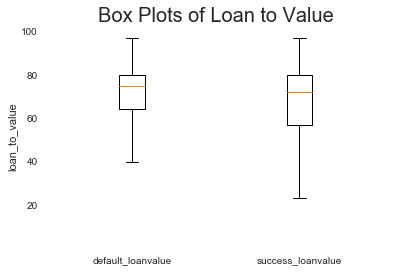

In [126]:
default_loanvalue = train_data[train_data['m13']==1]['loan_to_value'].values
success_loanvalue = train_data[train_data['m13']==0]['loan_to_value'].values
print("Average Loan to value for Delinquent: {} \nAverage Loan to value for Not-Delinquent: {} \n \n".format(default_loanvalue.mean(),success_loanvalue.mean()))
plt.boxplot([default_loanvalue, success_loanvalue])
plt.title('Box Plots of Loan to Value',fontsize=20)
plt.xticks([1,2],('default_loanvalue','success_loanvalue'))
plt.ylabel('loan_to_value')
plt.grid()
plt.show()

#### Z-Test: whether mean of two groups are statistically different
Null hypothesis: There is no Significant difference between Means of Loan to value between Delinquent and Not Delinquent

Alternative hypothesis: There is Significant difference between Means of Loan to value between Delinquent and Not Delinquent

In [129]:
ztest,pval=stests.ztest(x1=default_loanvalue,x2=success_loanvalue,value=0,alternative="two-sided")
prob=0.95
alpha=1-prob
if pval<alpha:
    print("Caluclated Statistic: {}  \n".format(ztest))
    print("P-Value: {}  \n".format(pval))
    print("Significant Value: {}  \n".format(alpha))
    print("Rejected Null Hypothesis and there is Significant difference between Means of Loan to value between Delinquent and Not Delinquent  with a probability of {}%".format((1-pval)*100))
else:
    print("Caluclated Statistic: {}  \n".format(ztest))
    print("P-Value: {}  \n".format(pval))
    print("Significant Value: {}  \n".format(alpha))
    print("Failed to reject Null Hypothesis and there is no significant difference between Means of Loan to value between Delinquent and Not Delinquent  with a probability of {}%".format((1-pval)*100))

Caluclated Statistic: 5.572980705239973  

P-Value: 2.5041731503960606e-08  

Significant Value: 0.050000000000000044  

Rejected Null Hypothesis and there is Significant difference between Means of Loan to value between Delinquent and Not Delinquent  with a probability of 99.99999749582685%


### Independent Variable: Debt to Income ratio

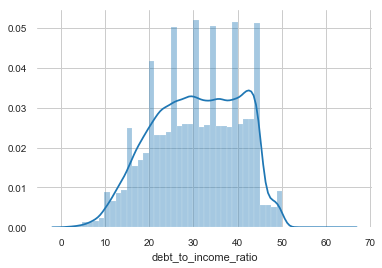

In [130]:
sns.distplot(train_data["debt_to_income_ratio"]);

Observarion: variable is fairly Symmetrical

Average debt_to_income_ratio for Delinquent: 35.727987421383645 
Average debt_to_income_ratio for Not-Delinquent: 30.714820398190987 
 



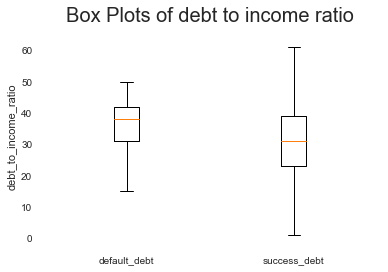

In [131]:
default_debt = train_data[train_data['m13']==1]['debt_to_income_ratio'].values
success_debt = train_data[train_data['m13']==0]['debt_to_income_ratio'].values
print("Average debt_to_income_ratio for Delinquent: {} \nAverage debt_to_income_ratio for Not-Delinquent: {} \n \n".format(default_debt.mean(),success_debt.mean()))
plt.boxplot([default_debt, success_debt])
plt.title('Box Plots of debt to income ratio',fontsize=20)
plt.xticks([1,2],('default_debt','success_debt'))
plt.ylabel('debt_to_income_ratio')
plt.grid()
plt.show()

#### Z-Test: whether mean of two groups are statistically different
Null hypothesis: There is no Significant difference between Means of debt to income ratio between Delinquent and Not Delinquent

Alternative hypothesis: There is Significant difference between Means of debt to income ratio between Delinquent and Not Delinquent



In [133]:
ztest,pval=stests.ztest(x1=default_debt,x2=success_debt,value=0,alternative="two-sided")
prob=0.95
alpha=1-prob
if pval<alpha:
    print("Caluclated Statistic: {}  \n".format(ztest))
    print("P-Value: {}  \n".format(pval))
    print("Significant Value: {}  \n".format(alpha))
    print("Rejected Null Hypothesis and there is Significant difference between Means of Loan to value between Delinquent and Not Delinquent  with a probability of {}%".format((1-pval)*100))
else:
    print("Caluclated Statistic: {}  \n".format(ztest))
    print("P-Value: {}  \n".format(pval))
    print("Significant Value: {}  \n".format(alpha))
    print("Failed to reject Null Hypothesis and there is no significant difference between Means of Loan to value between Delinquent and Not Delinquent  with a probability of {}%".format((1-pval)*100))

Caluclated Statistic: 12.966163522756224  

P-Value: 1.9032037474676087e-38  

Significant Value: 0.050000000000000044  

Rejected Null Hypothesis and there is Significant difference between Means of Loan to value between Delinquent and Not Delinquent  with a probability of 100.0%


### Independent Variable: Loan Purpose

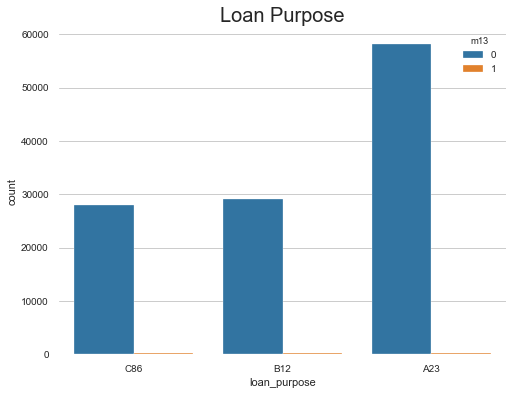

In [135]:
plt.figure(figsize=(8,6))
plt.title('Loan Purpose', fontsize=20)
sns.countplot(x='loan_purpose',hue='m13', data = train_data)
plt.show()

In [136]:
purpose_contigency=train_data[["loan_purpose","m13"]].pivot_table(index="loan_purpose",columns="m13",aggfunc=len,fill_value=0)
purpose_contigency

m13,0,1
loan_purpose,,
A23,58251,211
B12,29164,219
C86,28007,206


#### Pearson’s chi-squared test for independence
Null hypothesis: Assumes that there is no association between Loan Purpose and m13.

Alternative hypothesis: Assumes that there is an association between Loan Purpose and m13.

In [139]:
stat, p, dof, expected = chi2_contingency(purpose_contigency)
prob=0.9
alpha=1-prob
if p <= alpha:
    print("Calucalted Statistic: {}  \n".format(stat))
    print("P-Value: {}  \n".format(p))
    print("Significant Value: {}  \n".format(alpha))
    print("Rejected Null Hypothesis and Loan Purpose is a Significant variable to Predict Target Class with a probability of {}%".format((1-p)*100))
else:
    print("Failed to Reject Null Hypothesis and Loan Purpose is not a Significant Variable to Predict Target Classwith a probability of {}%".format((1-p)*100))


Calucalted Statistic: 75.7148885505342  

P-Value: 3.620102374301815e-17  

Significant Value: 0.09999999999999998  

Rejected Null Hypothesis and Loan Purpose is a Significant variable to Predict Target Class with a probability of 100.0%


### Independent Variable: Insurance Percent

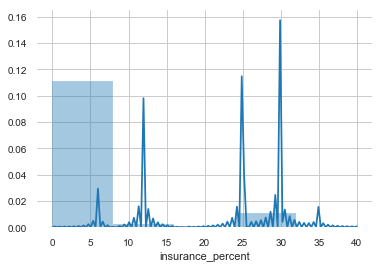

In [149]:
sns.distplot(train_data["insurance_percent"],bins=5);

Average insurance percent for Delinquent: 3.410377358490566 
Average insurance percent for Not-Delinquent: 2.782849023583026 
 



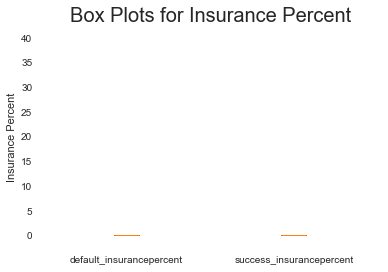

In [154]:
default_insurancepercent=train_data[train_data["m13"]==1]["insurance_percent"].values
success_insurancepercent=train_data[train_data["m13"]==0]["insurance_percent"].values
print("Average insurance percent for Delinquent: {} \nAverage insurance percent for Not-Delinquent: {} \n \n".format(default_insurancepercent.mean(),success_insurancepercent.mean()))
plt.boxplot([default_insurancepercent, success_insurancepercent],)
plt.title('Box Plots for Insurance Percent',fontsize=20)
plt.xticks([1,2],('default_insurancepercent','success_insurancepercent'))
plt.ylabel('Insurance Percent')
plt.grid()
plt.show()

#### Z-Test: whether mean of two groups are statistically different
Null hypothesis: There is no Significant difference between Means of Insurance Percent between Delinquent and Not Delinquent

Alternative hypothesis: There is Significant difference between Means of Insurance Percent between Delinquent and Not Delinquent

In [156]:
ztest,pval=stests.ztest(x1=default_insurancepercent,x2=success_insurancepercent,value=0,alternative="two-sided")
prob=0.90
alpha=1-prob
if pval<alpha:
    print("Caluclated Statistic: {}  \n".format(ztest))
    print("P-Value: {}  \n".format(pval))
    print("Significant Value: {}  \n".format(alpha))
    print("Rejected Null Hypothesis and there is Significant difference between Means of Insurance Percent between Delinquent and Not Delinquent  with a probability of {}%".format((1-pval)*100))
else:
    print("Caluclated Statistic: {}  \n".format(ztest))
    print("P-Value: {}  \n".format(pval))
    print("Significant Value: {}  \n".format(alpha))
    print("Failed to reject Null Hypothesis and there is no significant difference between Means of Insurance Percent between Delinquent and Not Delinquent  with a probability of {}%".format((1-pval)*100))

Caluclated Statistic: 1.94929930090077  

P-Value: 0.0512596920326916  

Significant Value: 0.09999999999999998  

Rejected Null Hypothesis and there is Significant difference between Means of Insurance Percent between Delinquent and Not Delinquent  with a probability of 94.87403079673084%


### Independent Variable: Insurance Type

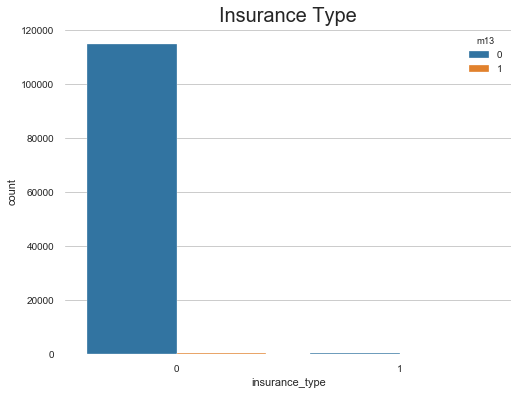

In [159]:
plt.figure(figsize=(8,6))
plt.title('Insurance Type', fontsize=20)
sns.countplot(x='insurance_type',hue='m13', data = train_data)
plt.show()

In [161]:
instype_contigency=train_data[["insurance_type","m13"]].pivot_table(index="insurance_type",columns="m13",aggfunc=len,fill_value=0)
instype_contigency

m13,0,1
insurance_type,,
0,115049,631
1,373,5


In [167]:
stat, p, dof, expected = chi2_contingency(instype_contigency)
prob=0.95
alpha=1-prob
if p <= alpha:
    print("Calucalted Statistic: {}  \n".format(stat))
    print("P-Value: {}  \n".format(p))
    print("Significant Value: {}  \n".format(alpha))
    print("Rejected Null Hypothesis and Insurance type is a Significant variable to Predict Target Class with a probability of {}%".format((1-p)*100))
else:
    print("Failed to Reject Null Hypothesis and Insurance type is not a Significant Variable to Predict Target Class at a significant level of {}".format(alpha))


Failed to Reject Null Hypothesis and Insurance type is not a Significant Variable to Predict Target Class at a significant level of 0.050000000000000044


### Independent Variable: number of borrowers

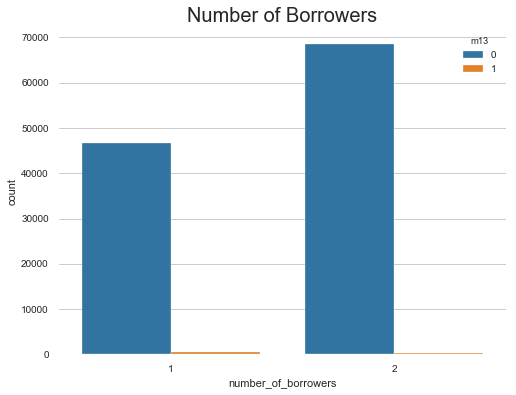

In [169]:
plt.figure(figsize=(8,6))
plt.title('Number of Borrowers', fontsize=20)
sns.countplot(x='number_of_borrowers',hue='m13', data = train_data)
plt.show()

In [171]:
borrowers_contigency=train_data[["number_of_borrowers","m13"]].pivot_table(index="number_of_borrowers",columns="m13",aggfunc=len,fill_value=0)
borrowers_contigency

m13,0,1
number_of_borrowers,,
1,46787,427
2,68635,209


In [173]:
stat, p, dof, expected = chi2_contingency(borrowers_contigency)
prob=0.95
alpha=1-prob
if p <= alpha:
    print("Calucalted Statistic: {}  \n".format(stat))
    print("P-Value: {}  \n".format(p))
    print("Significant Value: {}  \n".format(alpha))
    print("Rejected Null Hypothesis and Number of Borrowers is a Significant variable to Predict Target Class with a probability of {}%".format((1-p)*100))
else:
    print("Failed to Reject Null Hypothesis and Number of Borrowers is not a Significant Variable to Predict Target Class at a significant level of {}".format(alpha))


Calucalted Statistic: 184.39647783370052  

P-Value: 5.315611541075978e-42  

Significant Value: 0.050000000000000044  

Rejected Null Hypothesis and Number of Borrowers is a Significant variable to Predict Target Class with a probability of 100.0%


### Independent Variable: Borrower credit score

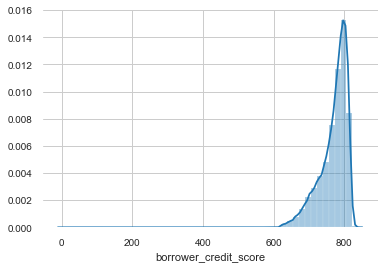

In [175]:
sns.distplot(train_data["borrower_credit_score"]);

Observation: Data is highly skewed negatively

Average borrower credit score for Delinquent: 716.3522012578617 
Average borrowercredit score for Not-Delinquent: 770.2219854100605 
 



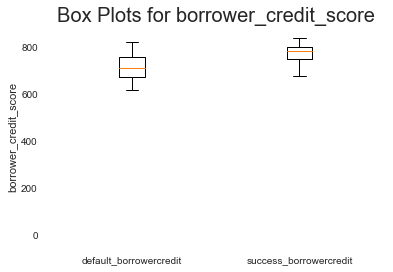

In [183]:
default_borrowercredit=train_data[train_data["m13"]==1]["borrower_credit_score"].values
success_borrowercredit=train_data[train_data["m13"]==0]["borrower_credit_score"].values
print("Average borrower credit score for Delinquent: {} \nAverage borrowercredit score for Not-Delinquent: {} \n \n".format(default_borrowercredit.mean(),success_borrowercredit.mean()))
plt.boxplot([default_borrowercredit, success_borrowercredit],)
plt.title('Box Plots for borrower_credit_score',fontsize=20)
plt.xticks([1,2],('default_borrowercredit','success_borrowercredit'))
plt.ylabel('borrower_credit_score')
plt.grid()
plt.show()

In [178]:
ztest,pval=stests.ztest(x1=default_borrowercredit,x2=success_borrowercredit,value=0,alternative="two-sided")
prob=0.95
alpha=1-prob
if pval<alpha:
    print("Caluclated Statistic: {}  \n".format(ztest))
    print("P-Value: {}  \n".format(pval))
    print("Significant Value: {}  \n".format(alpha))
    print("Rejected Null Hypothesis and there is Significant difference between Means of Borrower Credit Score between Delinquent and Not Delinquent  with a probability of {}%".format((1-pval)*100))
else:
    print("Caluclated Statistic: {}  \n".format(ztest))
    print("P-Value: {}  \n".format(pval))
    print("Significant Value: {}  \n".format(alpha))
    print("Failed to reject Null Hypothesis and there is no significant difference between Means of Borrower Credit Score between Delinquent and Not Delinquent  with a probability of {}%".format((1-pval)*100))

Caluclated Statistic: -32.23978888944829  

P-Value: 4.8912841466442044e-228  

Significant Value: 0.050000000000000044  

Rejected Null Hypothesis and there is Significant difference between Means of Borrower Credit Score between Delinquent and Not Delinquent  with a probability of 100.0%


### Independent Variable: Co-Borrower credit score

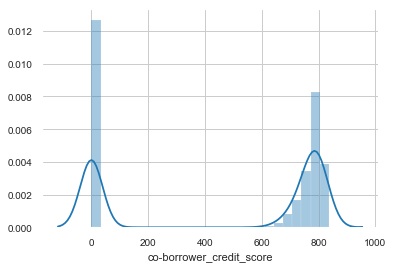

In [186]:
sns.distplot(train_data["co-borrower_credit_score"]);

Observation: Variable shows Bimodal distribution

Average co-borrower credit score for Delinquent: 240.15408805031447 
Average co-borrowercredit score for Not-Delinquent: 460.82082272010535 
 



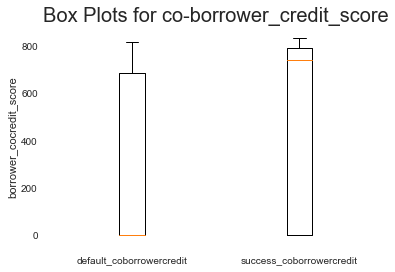

In [187]:
default_coborrowercredit=train_data[train_data["m13"]==1]["co-borrower_credit_score"].values
success_coborrowercredit=train_data[train_data["m13"]==0]["co-borrower_credit_score"].values
print("Average co-borrower credit score for Delinquent: {} \nAverage co-borrowercredit score for Not-Delinquent: {} \n \n".format(default_coborrowercredit.mean(),success_coborrowercredit.mean()))
plt.boxplot([default_coborrowercredit, success_coborrowercredit],)
plt.title('Box Plots for co-borrower_credit_score',fontsize=20)
plt.xticks([1,2],('default_coborrowercredit','success_coborrowercredit'))
plt.ylabel('borrower_cocredit_score')
plt.grid()
plt.show()

In [188]:
ztest,pval=stests.ztest(x1=default_coborrowercredit,x2=success_coborrowercredit,value=0,alternative="two-sided")
prob=0.95
alpha=1-prob
if pval<alpha:
    print("Caluclated Statistic: {}  \n".format(ztest))
    print("P-Value: {}  \n".format(pval))
    print("Significant Value: {}  \n".format(alpha))
    print("Rejected Null Hypothesis and there is Significant difference between Means of co-Borrower Credit Score between Delinquent and Not Delinquent  with a probability of {}%".format((1-pval)*100))
else:
    print("Caluclated Statistic: {}  \n".format(ztest))
    print("P-Value: {}  \n".format(pval))
    print("Significant Value: {}  \n".format(alpha))
    print("Failed to reject Null Hypothesis and there is no significant difference between Means of Co-Borrower Credit Score between Delinquent and Not Delinquent  with a probability of {}%".format((1-pval)*100))

Caluclated Statistic: -14.543290361401944  

P-Value: 6.442023849123872e-48  

Significant Value: 0.050000000000000044  

Rejected Null Hypothesis and there is Significant difference between Means of co-Borrower Credit Score between Delinquent and Not Delinquent  with a probability of 100.0%


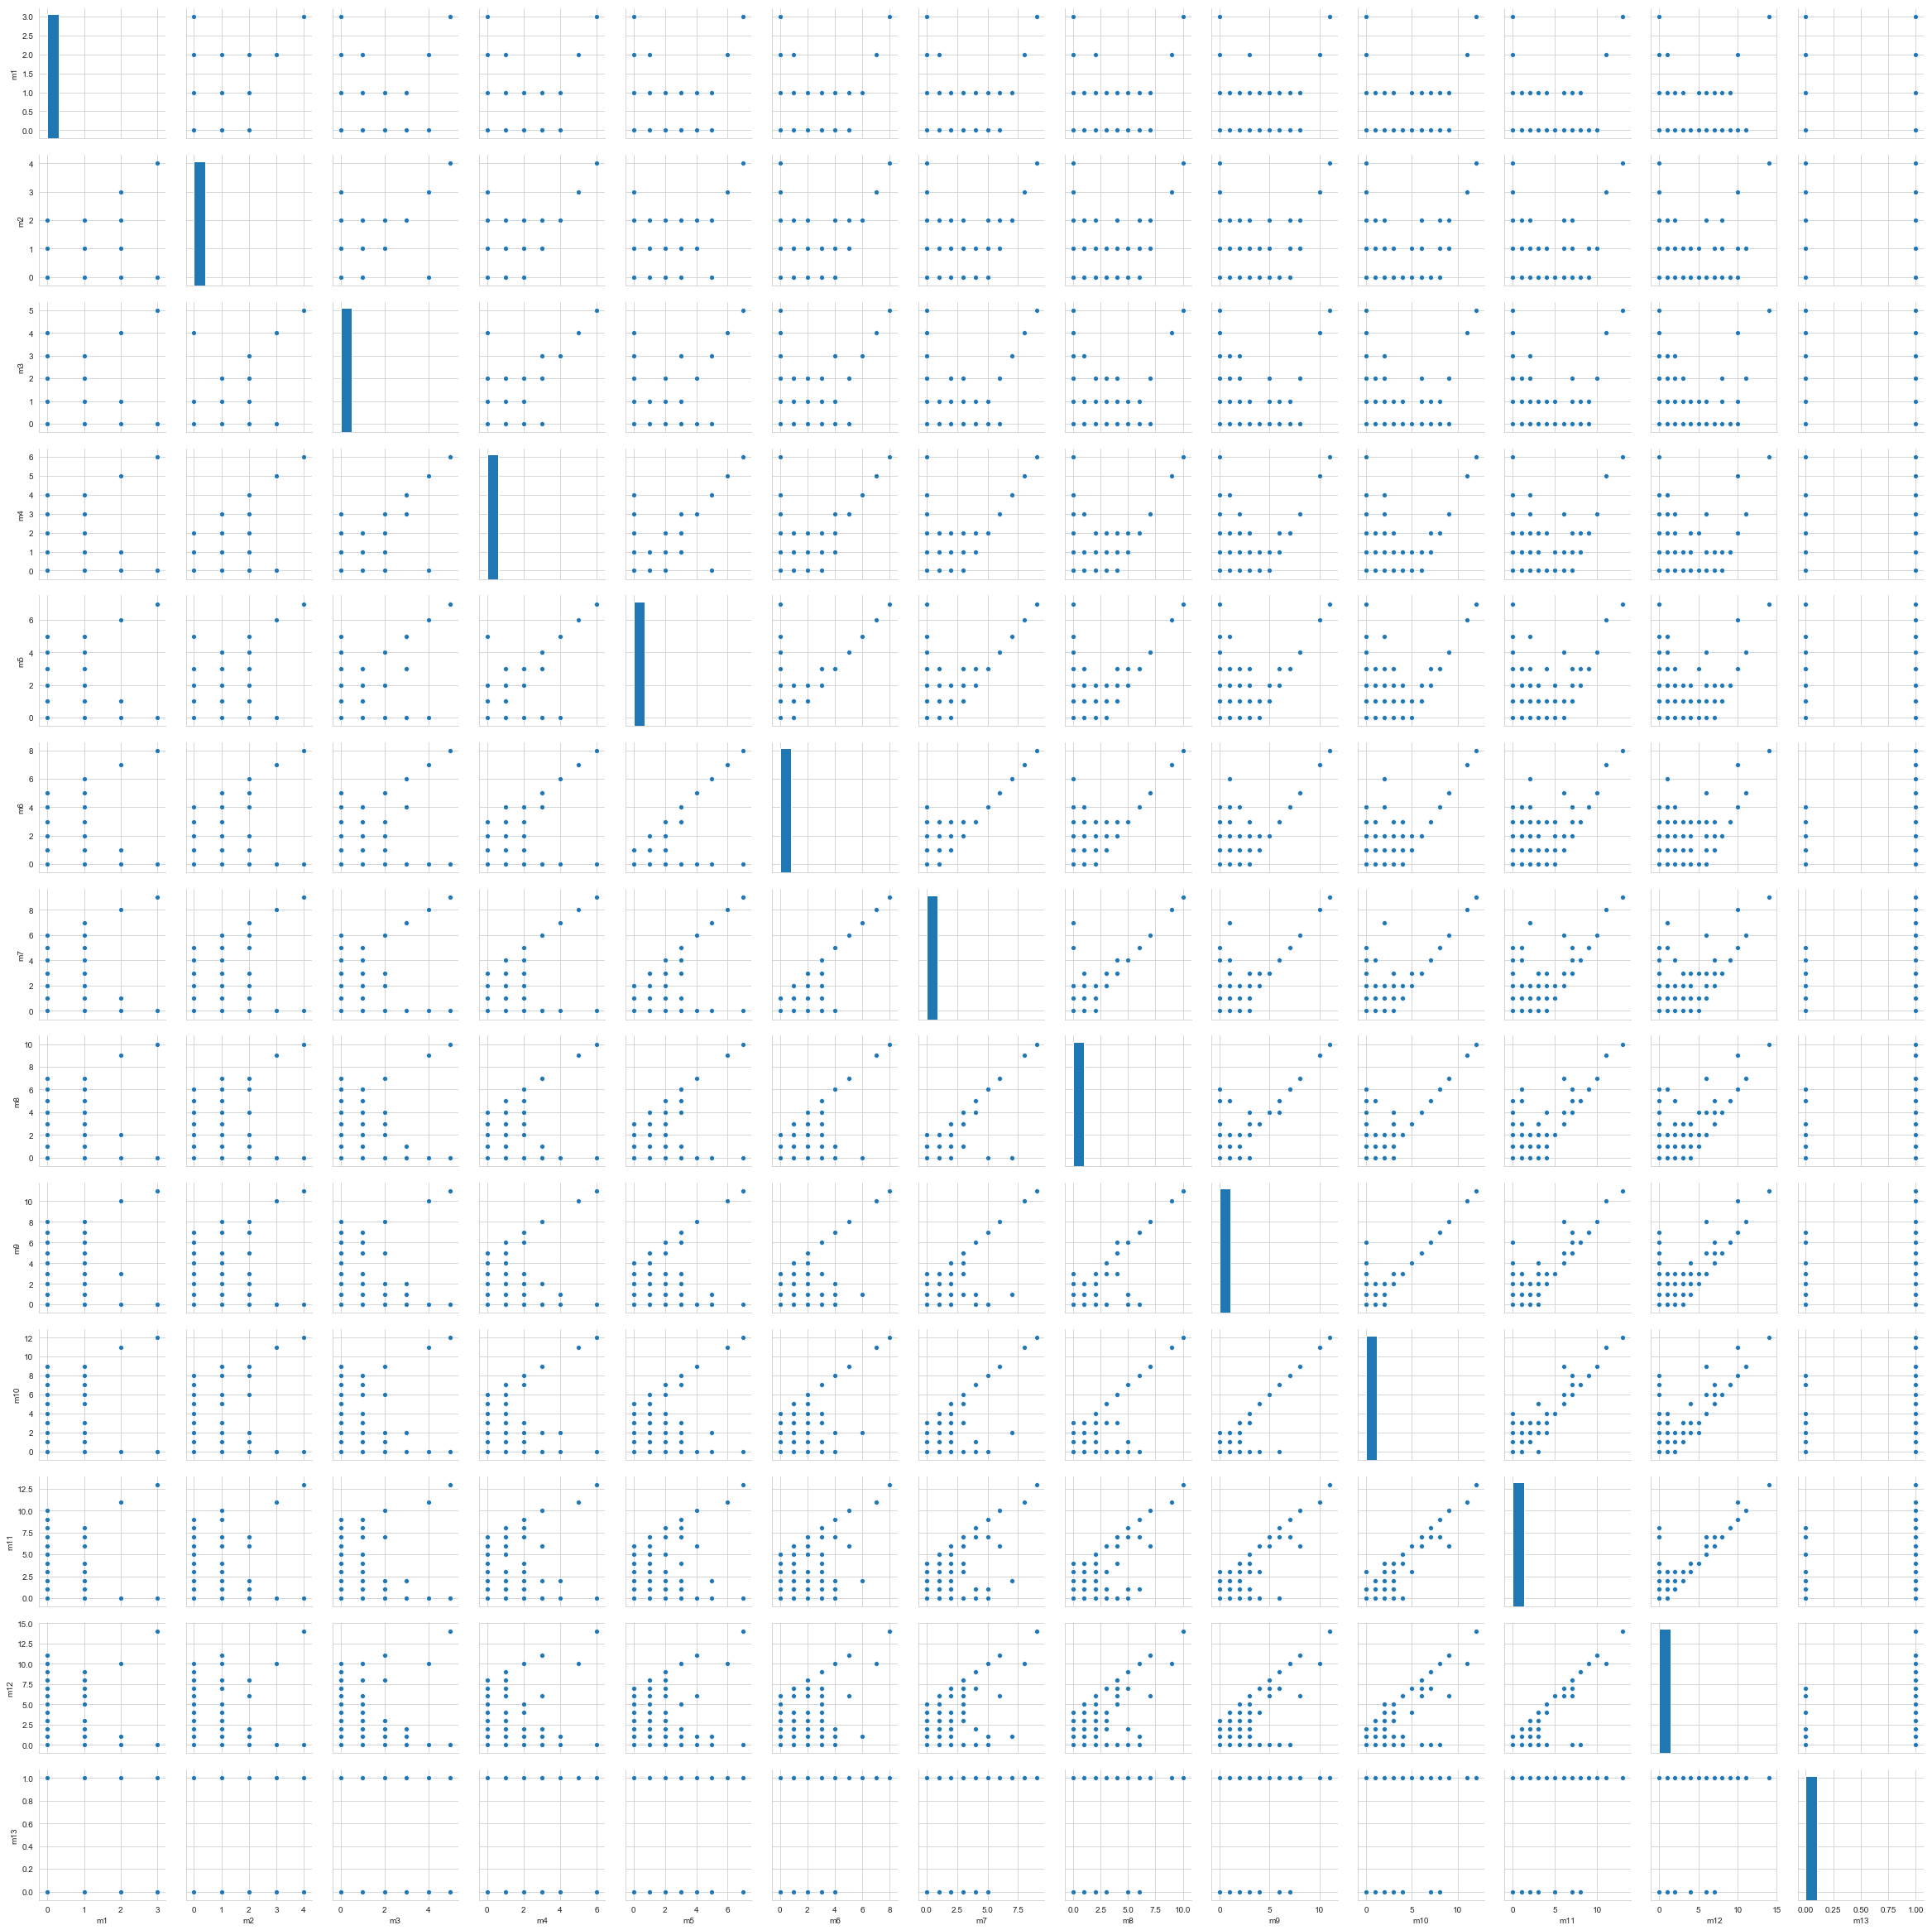

In [12]:
sns.pairplot(train_data.loc[:,"m1":"m13"]);

### Correlation Plot

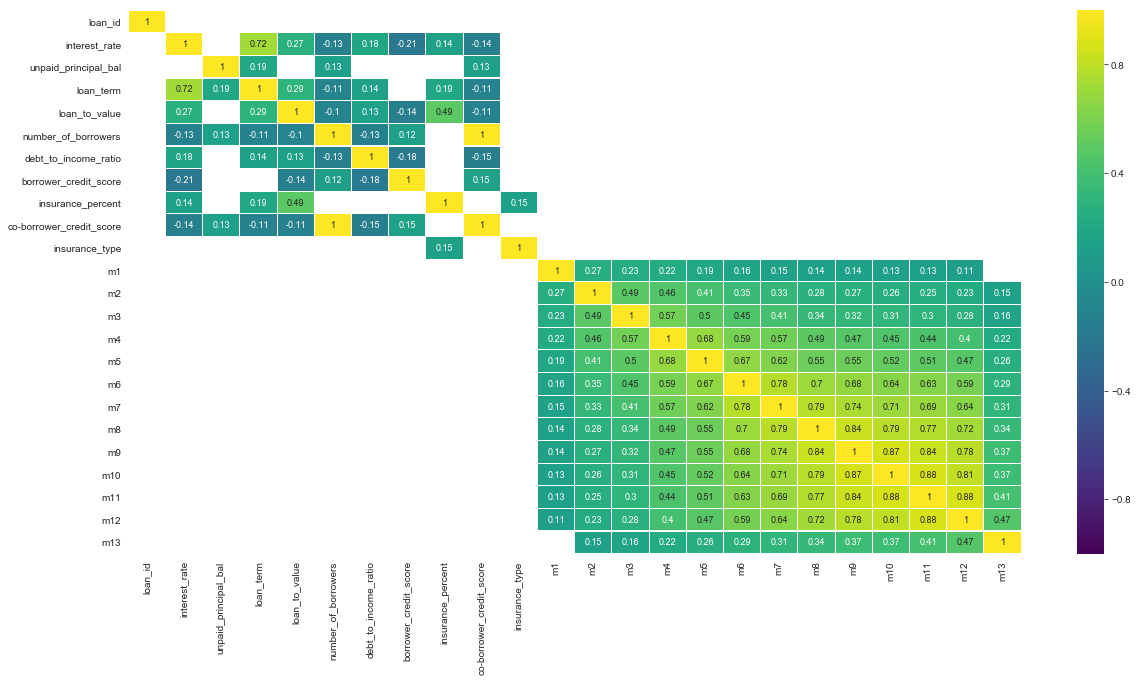

In [13]:
var_corr=train_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(var_corr[(var_corr>=0.1)|(var_corr<=-0.1)],annot=True,cmap="viridis",annot_kws={"size":9},linewidths=0.1,vmax=1.0,vmin=-1.0);

###### Co-borrower credit score is highly correlated to number of borrowers, so let drop co-borrower credit score 

### Feature Engineering

Create a new Variable for difference between Origination date and first payment date

In [3]:
train_data["origination_date"]=pd.to_datetime(train_data["origination_date"])
train_data["first_payment_date"]=pd.to_datetime(train_data["first_payment_date"])

In [4]:
train_data["days_payment_from_origin"]=(train_data["first_payment_date"]-train_data["origination_date"]).astype('timedelta64[D]')

Create a New variable using m1:m12, to find total delinqency count

In [5]:
a=np.array(train_data.loc[:,"m1":"m12"])
b=list()
for row in a:
    count=0
    for j in row:
        if j !=0:
            count +=1
    b.append(count)

In [6]:
train_data["Total_Delinquency_Count"]=b

In [7]:
Numerical_var=list(train_data.select_dtypes(include=np.number).columns)
Categorical_var=list(train_data.select_dtypes(include="O").columns)


In [8]:
train_dummies=pd.get_dummies(train_data[Categorical_var])

In [9]:
new_train=pd.concat([train_data[Numerical_var],train_dummies],axis=1)
new_train.drop(["loan_id","co-borrower_credit_score"],axis=1,inplace=True)
new_train.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,days_payment_from_origin,Total_Delinquency_Count,source_X,source_Y,source_Z,financial_institution_Anderson-Taylor,financial_institution_Browning-Hart,financial_institution_Chapman-Mcmahon,"financial_institution_Cole, Brooks and Vincent",financial_institution_Edwards-Hoffman,"financial_institution_Martinez, Duffy and Bird","financial_institution_Miller, Mcclure and Allen",financial_institution_Nicholson Group,financial_institution_OTHER,financial_institution_Richards-Walters,financial_institution_Richardson Ltd,"financial_institution_Romero, Woods and Johnson","financial_institution_Sanchez, Hays and Wilkerson",financial_institution_Sanchez-Robinson,financial_institution_Suarez Inc,"financial_institution_Swanson, Newton and Miller","financial_institution_Taylor, Hunt and Rodriguez",financial_institution_Thornton-Davis,"financial_institution_Turner, Baldwin and Rhodes",loan_purpose_A23,loan_purpose_B12,loan_purpose_C86
0,4.250,214000,360,95,1,22,694,30,0,0,0,0,0,0,0,1,0,0,0,0,0,1,61.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,4.875,144000,360,72,1,44,697,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,60.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3.250,366000,180,49,1,33,780,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,60.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,4.750,135000,360,46,2,44,633,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,60.0,4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,4.750,124000,360,80,1,43,681,0,0,0,1,2,3,4,5,6,7,8,9,10,11,1,60.0,11,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


### Prepare Evaluation Set

In [10]:
test_data["origination_date"]=pd.to_datetime(test_data["origination_date"])
test_data["first_payment_date"]=pd.to_datetime(test_data["first_payment_date"])
test_data["days_payment_from_origin"]=(test_data["first_payment_date"]-test_data["origination_date"]).astype('timedelta64[D]')


In [11]:
a=np.array(test_data.loc[:,"m1":"m12"])
b=list()
for row in a:
    count=0
    for j in row:
        if j !=0:
            count +=1
    b.append(count)

test_data["Total_Delinquency_Count"]=b

In [12]:
Numerical_var=list(test_data.select_dtypes(include=np.number).columns)
Categorical_var=list(test_data.select_dtypes(include="O").columns)

test_dummies=pd.get_dummies(test_data[Categorical_var])
new_test=pd.concat([test_data[Numerical_var],test_dummies],axis=1)
new_test.drop(["loan_id","co-borrower_credit_score"],axis=1,inplace=True)
new_test.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,days_payment_from_origin,Total_Delinquency_Count,source_X,source_Y,source_Z,financial_institution_Anderson-Taylor,financial_institution_Browning-Hart,financial_institution_Chapman-Mcmahon,"financial_institution_Cole, Brooks and Vincent",financial_institution_Edwards-Hoffman,"financial_institution_Martinez, Duffy and Bird","financial_institution_Miller, Mcclure and Allen",financial_institution_Nicholson Group,financial_institution_OTHER,financial_institution_Richards-Walters,financial_institution_Richardson Ltd,"financial_institution_Romero, Woods and Johnson","financial_institution_Sanchez, Hays and Wilkerson",financial_institution_Sanchez-Robinson,financial_institution_Suarez Inc,"financial_institution_Swanson, Newton and Miller","financial_institution_Taylor, Hunt and Rodriguez",financial_institution_Thornton-Davis,"financial_institution_Turner, Baldwin and Rhodes",loan_purpose_A23,loan_purpose_B12,loan_purpose_C86
0,3.875,417000,360,75,1,20,790,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,4.500,113000,360,80,2,33,793,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,4.500,72000,360,75,1,34,710,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4.125,123000,180,41,2,24,798,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,3.250,166000,180,53,2,12,767,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Prepare X and Y

In [13]:
x=new_train.drop(["m13"],axis=1)
y=new_train["m13"]

In [14]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=21)

### Logistic Regression

In [200]:
lr_dummies=pd.get_dummies(train_data[Categorical_var],drop_first=True)
lr_train=pd.concat([train_data[Numerical_var],lr_dummies],axis=1)
lr_train.drop(["loan_id","co-borrower_credit_score"],axis=1,inplace=True)

In [202]:
xl=lr_train.drop(['m13'],axis=1)
yl=lr_train["m13"]
xl_train,xl_test,yl_train,yl_test=train_test_split(xl,yl,test_size=0.3,random_state=21)

In [288]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xl_train,yl_train)
lr_pred=lr.predict(xl_test)
pd.crosstab(yl_test,lr_pred)


col_0,0,1
m13,,
0,34635,11
1,172,0


In [289]:
print(classification_report(yl_test,lr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34646
           1       0.00      0.00      0.00       172

    accuracy                           0.99     34818
   macro avg       0.50      0.50      0.50     34818
weighted avg       0.99      0.99      0.99     34818



###### Default Parameters of Logistic Regression failed to classify Deliquency and let try Hyperparameter tuning

#### Logistic Regression- Hyperparameter tuning

In [286]:
penalty=["l1","l2"]
C=np.logspace(-2,1,50)
max_iter=[90,100,110,120,130,140,150,200,300]
param_grid=dict(penalty=penalty,C=C,max_iter=max_iter)
lr=LogisticRegression()
grid=RandomizedSearchCV(estimator=lr,param_distributions=param_grid,cv=5,scoring="f1",n_jobs=-1)
grid_result=grid.fit(xl_train,yl_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.516315 using {'penalty': 'l1', 'max_iter': 100, 'C': 0.3906939937054617}


In [290]:
lr_h=LogisticRegression(penalty="l1",max_iter=100,C=0.3906)
kfold=KFold(n_splits=5,random_state=21)
result=cross_val_score(lr_h,xl_train,yl_train,scoring="f1",n_jobs=-1,cv=kfold)
print(result)
print("Mean F1 Score: {}".format(result.mean()))

[0.54676259 0.56521739 0.47682119 0.5112782  0.48695652]
Mean F1 Score: 0.5174071781026475


In [291]:
lr_h.fit(xl_train,yl_train)
lr_pred=lr_h.predict(xl_test)
pd.crosstab(yl_test,lr_pred)

col_0,0,1
m13,,
0,34624,22
1,116,56


In [292]:
print(classification_report(yl_test,lr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34646
           1       0.72      0.33      0.45       172

    accuracy                           1.00     34818
   macro avg       0.86      0.66      0.72     34818
weighted avg       1.00      1.00      1.00     34818



In [299]:
Variable_coeff=pd.Series(lr_h.coef_[0],index=xl_train.columns)
Variable_coeff.sort_values(ascending=False)


m12                                                  2.715564
Total_Delinquency_Count                              1.193369
interest_rate                                        0.415203
financial_institution_Edwards-Hoffman                0.134085
source_Y                                             0.057804
debt_to_income_ratio                                 0.033843
loan_purpose_B12                                     0.027169
loan_to_value                                        0.002387
insurance_percent                                    0.002077
loan_term                                            0.000597
financial_institution_Thornton-Davis                 0.000000
source_Z                                             0.000000
insurance_type                                       0.000000
m1                                                   0.000000
m4                                                   0.000000
m8                                                   0.000000
m9      

In [234]:
lr_dummies=pd.get_dummies(test_data[Categorical_var],drop_first=True)
lr_test=pd.concat([test_data[Numerical_var],lr_dummies],axis=1)
lr_test.drop(["loan_id","co-borrower_credit_score"],axis=1,inplace=True)
logistic_evaluation=pd.DataFrame(lr_h.predict(lr_test))
logistic_evaluation.rename(columns={0:"m13"},inplace=True)
pd.concat([test_raw["loan_id"],logistic_evaluation["m13"]],axis=1).to_csv("logistic_evaluation.csv",index=False)

### Decision Tree for Classification

In [243]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
f1_score(y_train,DTC.predict(x_train))

1.0

In [242]:
DTC_pred=DTC.predict(x_test)
pd.crosstab(y_test,DTC_pred)



col_0,0,1
m13,,
0,34504,142
1,112,60


In [241]:
print(classification_report(y_test,DTC_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34646
           1       0.30      0.35      0.32       172

    accuracy                           0.99     34818
   macro avg       0.65      0.67      0.66     34818
weighted avg       0.99      0.99      0.99     34818



Decision Tress is failing to generalize on new data using default parameters. Let Hypertune the parameters to avoid overfittng by setting constraints on tree growth

#### Decision Tree- Hyperparameter Tuning

In [260]:
model_DTC=DecisionTreeClassifier(random_state=21)

params={"max_features":['auto','sqrt', 'log2'],"min_samples_split":[2,3,4,  5,  6,  7,  8,  9, 10, 11, 12, 13,14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,26,27,28,29,30,50,70,100,150],"min_samples_leaf":[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,14, 15,20,25]}

grid=RandomizedSearchCV(model_DTC,param_distributions=params,cv=5,n_jobs=-1,scoring="f1")

grid.fit(x_train,y_train)
print("Best F1 score : %f using %s" % (grid.best_score_, grid.best_params_))


Best F1 score : 0.462931 using {'min_samples_split': 20, 'min_samples_leaf': 5, 'max_features': 'sqrt'}


In [263]:
DCT=DecisionTreeClassifier(min_samples_split= 20, min_samples_leaf= 5, max_features= 'sqrt',random_state=123)
result=cross_val_score(DCT,x_train,y_train,scoring="f1",n_jobs=-1,cv=kfold)
print(result)
print("Mean F1 Score: {}".format(result.mean()))

[0.54054054 0.52054795 0.44848485 0.48529412 0.48695652]
Mean F1 Score: 0.4963647947234115


In [265]:
DCT.fit(x_train,y_train)
DCT_pred=DCT.predict(x_test)
pd.crosstab(y_test,DCT_pred)

col_0,0,1
m13,,
0,34611,35
1,105,67


In [266]:
print(classification_report(y_test,DCT_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34646
           1       0.66      0.39      0.49       172

    accuracy                           1.00     34818
   macro avg       0.83      0.69      0.74     34818
weighted avg       1.00      1.00      1.00     34818



#### Feature Importance

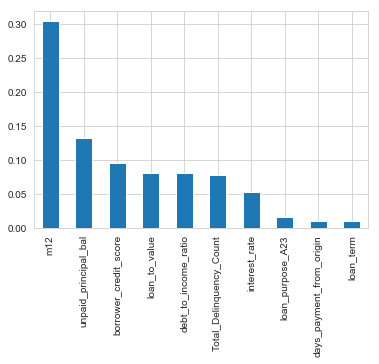

In [281]:
feat_importances = pd.Series(DTC.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).plot(kind='bar');

In [282]:
DTC_evaluation=pd.DataFrame(DTC.predict(new_test))
DTC_evaluation.rename(columns={0:"m13"},inplace=True)
pd.concat([test_raw["loan_id"],DTC_evaluation["m13"]],axis=1).to_csv("DTC_evaluation.csv",index=False)

### Random Forest- Bagging Technique

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=123,bootstrap=True)
rf.fit(x_train,y_train)
f1_score(y_train,rf.predict(x_train))

0.9357798165137614

In [304]:
rf_pred=rf.predict(x_test)
pd.crosstab(y_test,rf_pred)



col_0,0,1
m13,,
0,34628,18
1,118,54


In [305]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34646
           1       0.75      0.31      0.44       172

    accuracy                           1.00     34818
   macro avg       0.87      0.66      0.72     34818
weighted avg       1.00      1.00      1.00     34818



#### Random Forest-Hyperparameter Tuning

In [22]:
n_estimators=[100,400,500,600,900]
max_depth = np.linspace(1, 32, 32, endpoint=True)
min_samples_split = [2,5,10,15,16,17,18,19,20,21,22,23,24,25,30,50,60]
min_samples_leaf = [2,3,4,5,6,7,8,9,10,15,20,25,30]
max_features = ['auto','sqrt', 'log2']
rf_params=dict(n_estimators=n_estimators,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,max_features=max_features)
grid=RandomizedSearchCV(rf,param_distributions=rf_params,scoring="f1",n_jobs=-1,cv=5)
grid.fit(x_train,y_train)
print("Best F1 score : %f using %s" % (grid.best_score_, grid.best_params_))


Best F1 score : 0.503643 using {'n_estimators': 100, 'min_samples_split': 19, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 31.0}


In [28]:
rf=RandomForestClassifier(random_state=123,bootstrap=True,n_estimators= 100, 
                          min_samples_split= 19, min_samples_leaf= 2, max_features= "sqrt", max_depth= 31)
kfold=KFold(n_splits=5,random_state=21)
result=cross_val_score(rf,x_train,y_train,cv=kfold,scoring="f1",n_jobs=-1)
print(result)
print("Mean F1 Score: {}".format(result.mean()))

[0.53030303 0.51851852 0.47058824 0.52713178 0.46017699]
Mean F1 Score: 0.5013437116423691


In [29]:
rf.fit(x_train,y_train)

rf_pred=rf.predict(x_test)
pd.crosstab(y_test,rf_pred)

col_0,0,1
m13,,
0,34628,18
1,117,55


In [30]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34646
           1       0.75      0.32      0.45       172

    accuracy                           1.00     34818
   macro avg       0.88      0.66      0.72     34818
weighted avg       1.00      1.00      1.00     34818



In [31]:
rf_evaluation=pd.DataFrame(rf.predict(new_test))
rf_evaluation.rename(columns={0:"m13"},inplace=True)
pd.concat([test_raw["loan_id"],rf_evaluation["m13"]],axis=1).to_csv("rf_evaluation.csv",index=False)

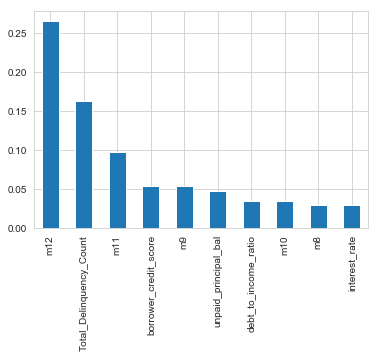

In [34]:
feat_importances = pd.Series(rf.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).plot(kind='bar');

### XGB

In [35]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
xgb_pred=xgb.predict(x_test)
f1_score(y_train,xgb.predict(x_train))


0.597968069666183

In [36]:

pd.crosstab(y_test,xgb_pred)



col_0,0,1
m13,,
0,34618,28
1,109,63


In [37]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34646
           1       0.69      0.37      0.48       172

    accuracy                           1.00     34818
   macro avg       0.84      0.68      0.74     34818
weighted avg       1.00      1.00      1.00     34818



#### XGB Hyperparameter Tuning

In [40]:
param_xgb = {
 'max_depth':[5,10,15,20,22,25,28,30,32,25],
 'min_child_weight':[2,3,4,5,6,7,8,9,10,15,20],
'gamma':[0.0, 0.1, 0.2, 0.3, 0.4,0.5],
'subsample':[0.5,0.6, 0.7, 0.8, 0.9,1],
'colsample_bytree':[0.5,0.6, 0.7, 0.8, 0.9,1],
'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05,0.1,0.2,0.5,1,1.5,2,2.5,3],
'scale_pos_weight': [1,2,3,4,5,6,7,8,9,10],
'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05,0.1,0.2,0.5,1,1.5,2,2.5,3]
    
}

xgb=XGBClassifier(n_estimators=500,objective= 'binary:logistic',class_weight="balanced",nthread=4,seed=123)

xgrid=RandomizedSearchCV(xgb,param_distributions=param_xgb,scoring="f1",n_jobs=-1,cv=5)

xgrid.fit(x_train,y_train)

print("Best F1 score : %f using %s" % (xgrid.best_score_,xgrid.best_params_))


Best F1 score : 0.531737 using {'subsample': 1, 'scale_pos_weight': 10, 'reg_alpha': 1.5, 'min_child_weight': 3, 'max_depth': 10, 'gamma': 0.0, 'colsample_bytree': 0.6}


In [41]:

xgbc = XGBClassifier(learning_rate =.1,
 n_estimators=500,
 max_depth=10,
 min_child_weight=3,
 gamma=0.0,
 subsample=1,
 colsample_bytree=0.6,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=10,
 reg_alpha=1.5,  
class_weight="balanced",
 seed=27)

In [46]:
kfold=KFold(n_splits=5,random_state=21)
result=cross_val_score(xgbc,x_train,y_train,cv=kfold,scoring="f1",n_jobs=-1)
print(result)
print("Mean F1 Score: {}".format(result.mean()))

[0.5408805  0.57718121 0.48888889 0.49006623 0.49230769]
Mean F1 Score: 0.5178649035120979


In [42]:
xgbc.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              gamma=0.0, learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=3, missing=None, n_estimators=500, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=1.5, reg_lambda=1, scale_pos_weight=10, seed=27,
              silent=None, subsample=1, verbosity=1)

In [43]:
y_pred = xgbc.predict(x_test)

In [44]:
pd.crosstab(y_test, y_pred)


col_0,0,1
m13,,
0,34589,57
1,101,71


In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34646
           1       0.55      0.41      0.47       172

    accuracy                           1.00     34818
   macro avg       0.78      0.71      0.74     34818
weighted avg       0.99      1.00      1.00     34818



In [47]:
xgb_evaluation=pd.DataFrame(xgbc.predict(new_test))
xgb_evaluation.rename(columns={0:"m13"},inplace=True)
pd.concat([test_raw["loan_id"],xgb_evaluation["m13"]],axis=1).to_csv("xgb_evaluation.csv",index=False)